In [3]:
lst = [1.234234, 4.238, 8.3435345, 5, 2, 3, 12]


In [2]:
min(lst)

1.234234

In [4]:
max(lst)

12

In [1]:
import numpy as np   

In [9]:
nx, ny = (3, 2)

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [10]:
x

array([0. , 0.5, 1. ])

In [11]:
y

array([0., 1.])

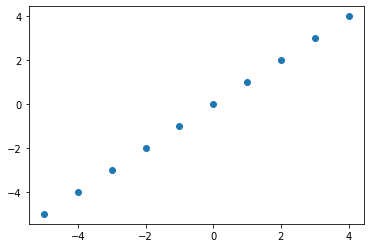

In [5]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)

h = plt.scatter(x,y)
plt.show()

In [14]:
z

array([[-0.0052475 , -0.00386885,  0.01556126, -0.02288393,  0.02932917,
        -0.00529407,  0.02932917, -0.02288393,  0.01556126, -0.00386885],
       [-0.00386885,  0.01723208, -0.00529407,  0.04564726, -0.05655279,
        -0.01799396, -0.05655279,  0.04564726, -0.00529407,  0.01723208],
       [ 0.01556126, -0.00529407, -0.04172151,  0.03232054, -0.05440211,
         0.04579094, -0.05440211,  0.03232054, -0.04172151, -0.00529407],
       [-0.02288393,  0.04564726,  0.03232054,  0.12366978, -0.19178485,
        -0.18920062, -0.19178485,  0.12366978,  0.03232054,  0.04564726],
       [ 0.02932917, -0.05655279, -0.05440211, -0.19178485,  0.45464871,
         0.84147098,  0.45464871, -0.19178485, -0.05440211, -0.05655279],
       [-0.00529407, -0.01799396,  0.04579094, -0.18920062,  0.84147098,
                nan,  0.84147098, -0.18920062,  0.04579094, -0.01799396],
       [ 0.02932917, -0.05655279, -0.05440211, -0.19178485,  0.45464871,
         0.84147098,  0.45464871, -0.19178485

In [1]:
from scipy import spatial

import sys
import math
import csv
import random
import json 
import time

import math
import numpy
import scipy.spatial
import startin 

try:
    jparams = json.load(open('params.json'))
except:
    print("ERROR: something is wrong with the params.json file.")
    sys.exit()
#-- store the input 3D points in list
list_pts_3d = []
with open(jparams['input-file']) as csvfile:
    r = csv.reader(csvfile, delimiter=' ')
    header = next(r)
    for line in r:
        p = list(map(float, line)) #-- convert each str to a float
        assert(len(p) == 3)
        list_pts_3d.append(p)
j_nn = jparams['nn']

def bbox(point_list, cell_size=1):
    # split the list of 3d points in lists for x and y 
    x_list = []
    y_list = []
    for points in point_list: 
        x = points[0]
        x_list.append(x)
        y = points[1]
        y_list.append(y)
    # find the lower left and upper right coordinate
    min_coordinate = (min(x_list), min(y_list))
    max_coordinate = (max(x_list), max(y_list))

    # find first 
    height_bb = max_coordinate[1] - min_coordinate[1]
    width_bb = max_coordinate[0] - min_coordinate[0]

    if height_bb % cell_size == 0 and width_bb % cell_size == 0:
        return min_coordinate, max_coordinate
    elif height_bb % cell_size == 0 and width_bb % cell_size != 0:
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        max_coordinate_new = (new_max_x, max_coordinate[1])
        return min_coordinate, max_coordinate_new
    elif height_bb % cell_size != 0 and width_bb % cell_size == 0:
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (max_coordinate, new_max_y)
        return min_coordinate, max_coordinate_new
    else: 
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (new_max_x, new_max_y)
        return min_coordinate, max_coordinate_new

def gridding():
    min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize']) 
    x_axis = []
    y_axis = []
    for i in numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize']):
        if i <= max_coordinate[0]:
            x_axis.append(i)
            #print('x axis', x_axis)
    for i in numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize']):
        if i <= max_coordinate[1]:
            y_axis.append(i)
            #print('y axis', y_axis)
    grid = numpy.meshgrid(x_axis, y_axis)
    return grid


In [2]:
X, Y = gridding()

Yt = Y.transpose()

TypeError: 'MGridClass' object is not callable

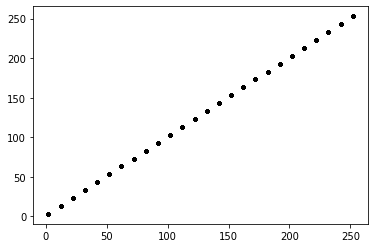

In [29]:
from matplotlib import pyplot as plt
plt.plot(X,Yt,  marker='.', color='k', linestyle='none')

In [19]:
X

array([[  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252.]])

In [21]:
Y

array([[  3.,  13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93., 103.,
        113., 123., 133., 143., 153., 163., 173., 183., 193., 203., 213.,
        223., 233., 243., 253.]])

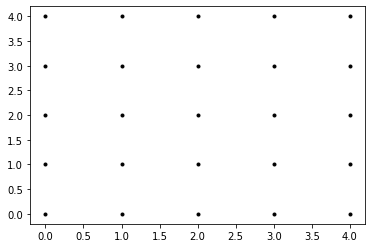

In [23]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

In [35]:
xx

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [36]:
yy

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])